In [6]:
# Install Packages
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn

In [7]:
from sklearn import preprocessing
import os, requests
from matplotlib import rcParams 
from matplotlib import pyplot as plt
import numpy as np


In [8]:
# Data Retrieval

fname = 'joystick_track.npz'
url = "https://osf.io/6jncm/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)


In [9]:
# Import matplotlib and set styling
import seaborn as sns
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

colourmap_diverge = sns.diverging_palette(321, 172, s=100, n=100, center = "light", as_cmap=True)
colourmap = sns.color_palette("rocket", as_cmap=True)
colourmap = sns.light_palette("#30887c", as_cmap=True)
colourmap_diverge.set_bad("black", alpha=0)
colourmap.set_bad("black", alpha=0)

In [10]:
# Data Loading
alldat = np.load(fname, allow_pickle=True)['dat']

# Select just one of the recordings here. This is subject 1, block 1.
dat = alldat[0, 3]

patient 0 : 60 channels 372760 data points
patient 1 : 64 channels 248640 data points
patient 2 : 64 channels 134360 data points
patient 3 : 48 channels 259920 data points


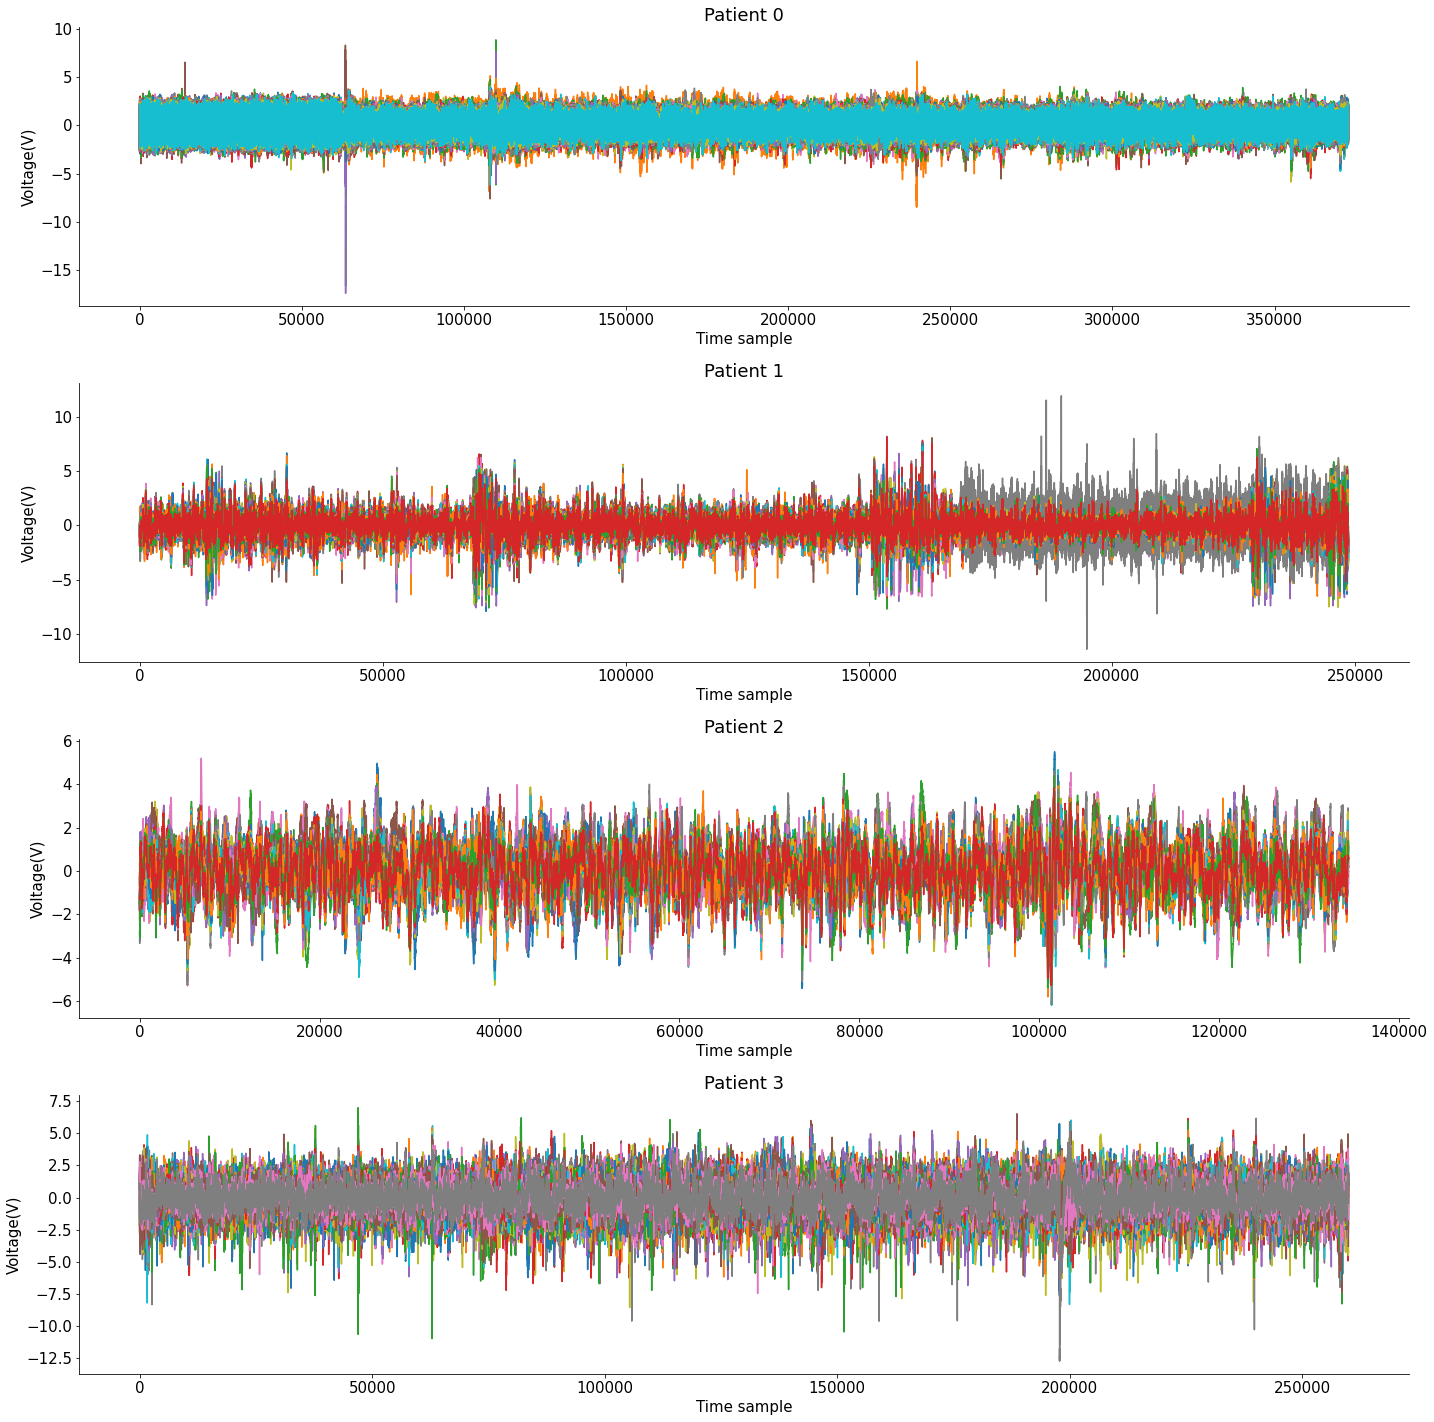

In [16]:
# Voltage Visualisation for all patients

plt.figure(figsize=(20, 20))
for p in range(4):
    plt.subplot(4, 1, p+1)
    dat = alldat[0, p]
    print('patient', p, ':', dat['V'].shape[1],  'channels', dat['V'].shape[0], 'data points')
    plt.plot(dat['V'])
    plt.title('Patient ' + str(p))
    plt.ylabel('Voltage(V)')
    plt.xlabel('Time sample')
    
plt.show()

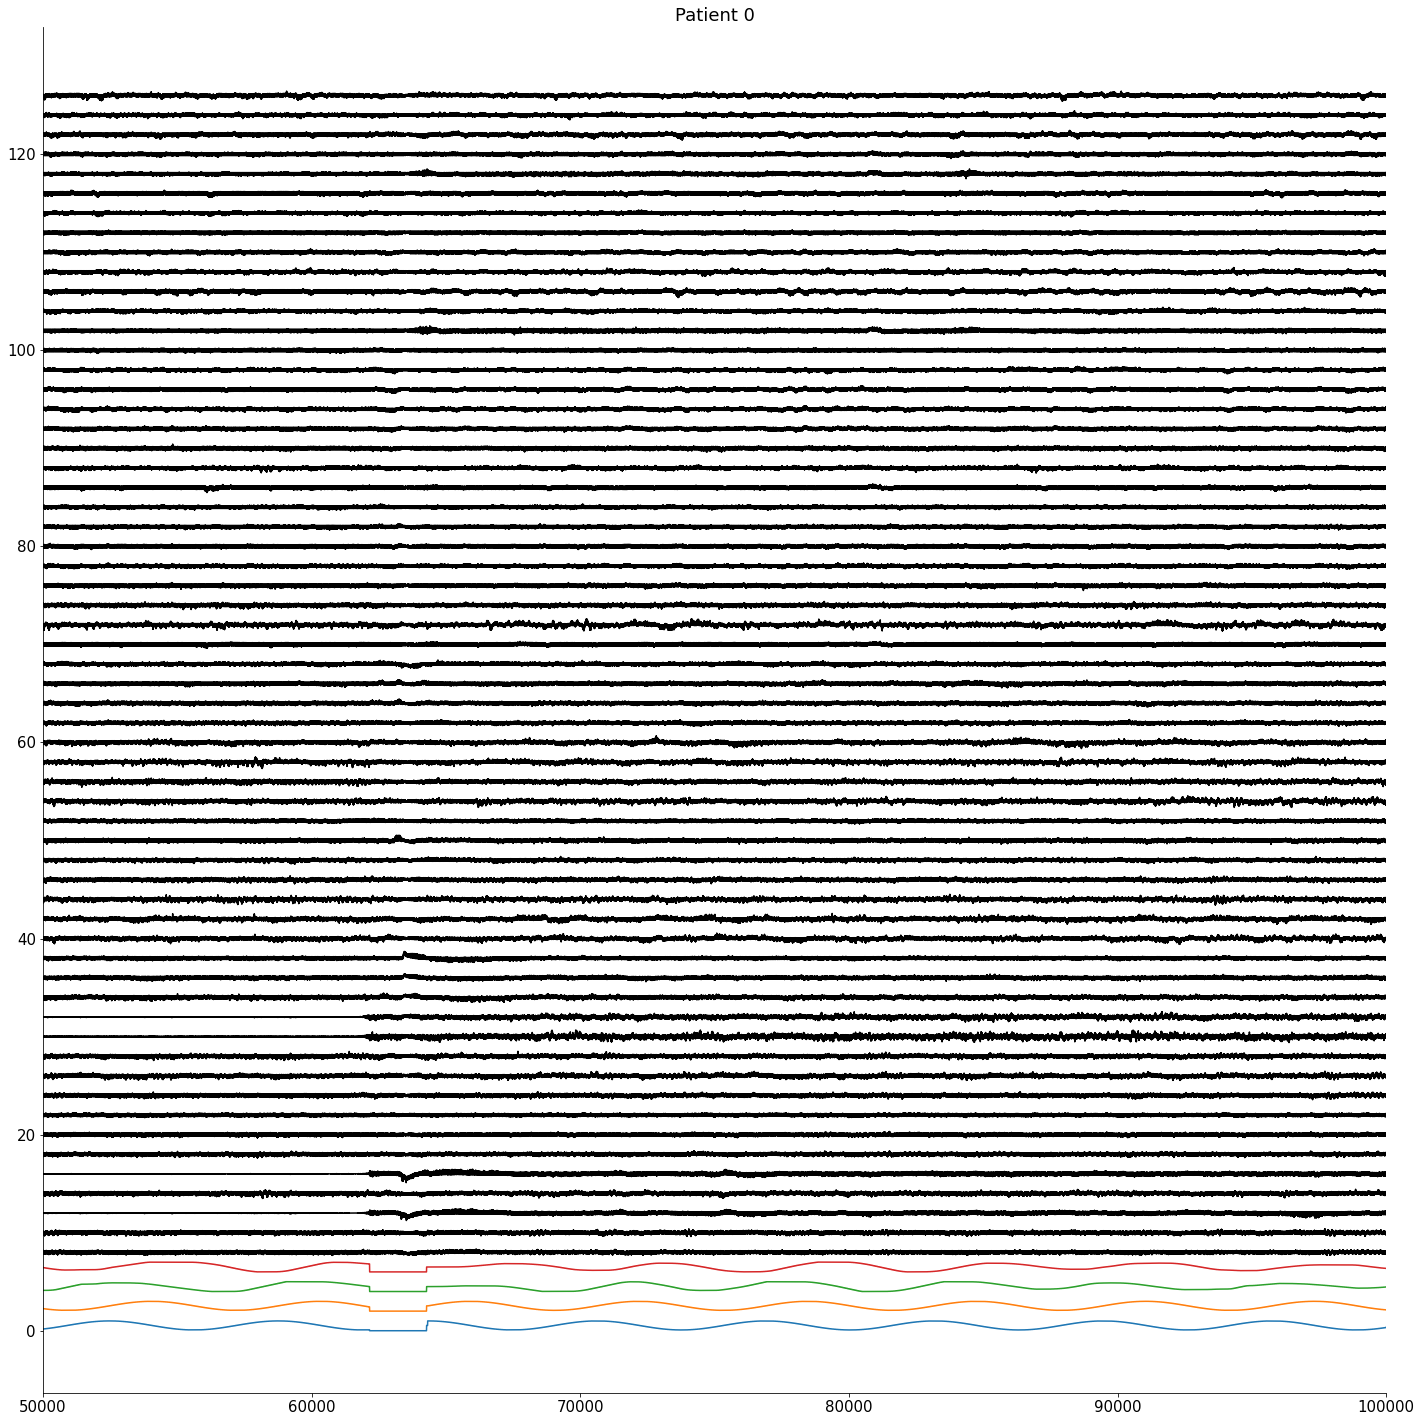

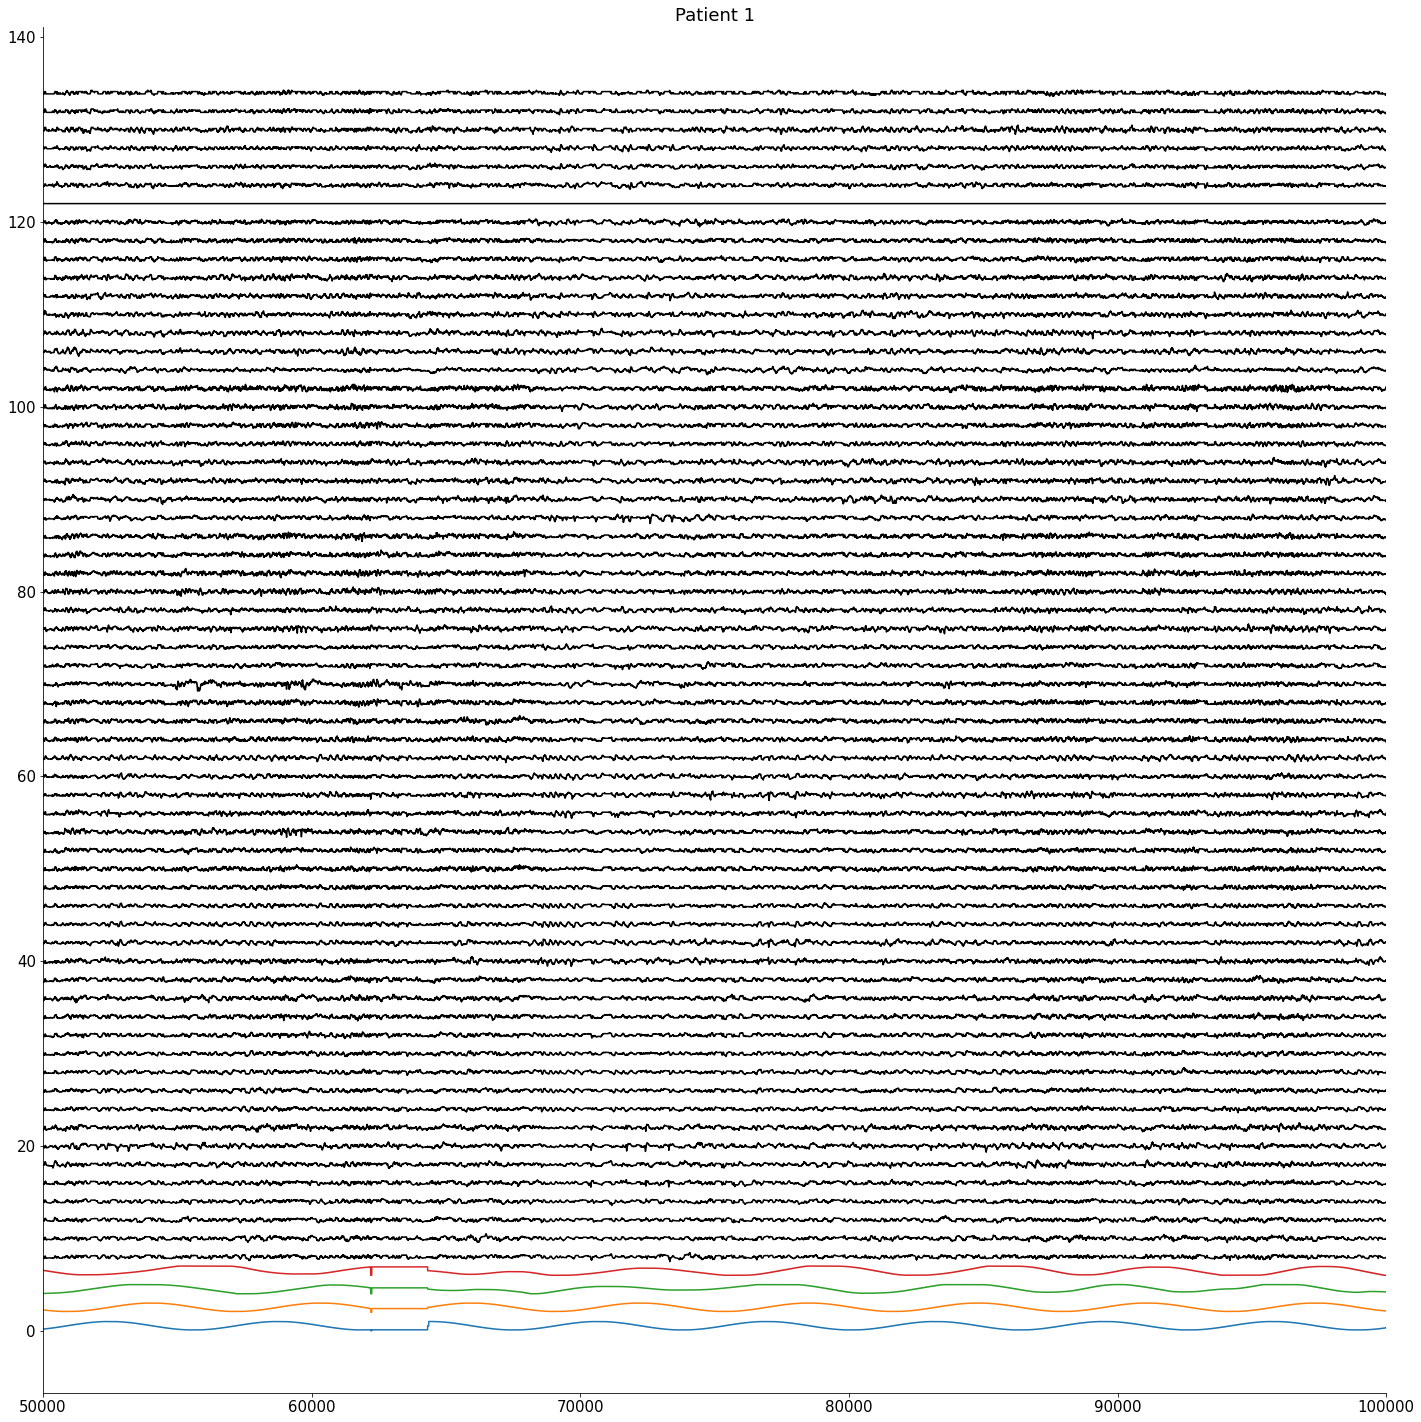

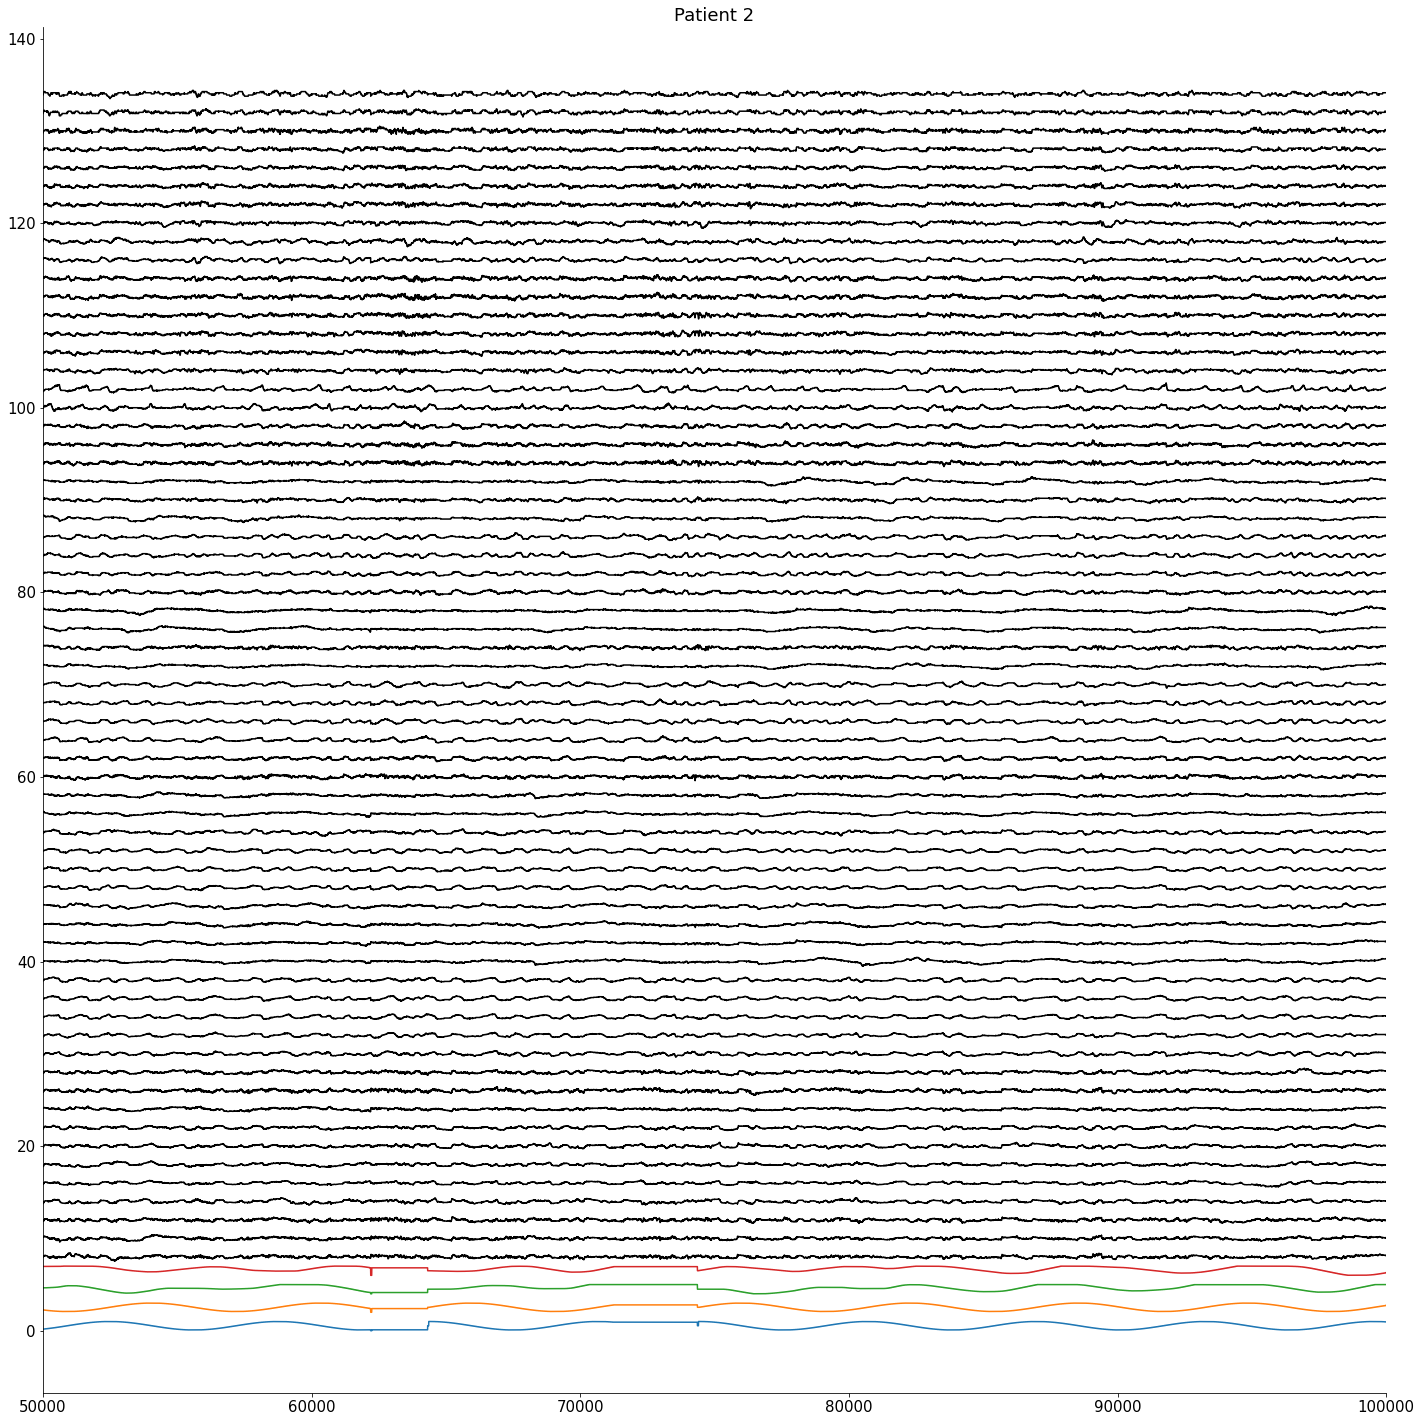

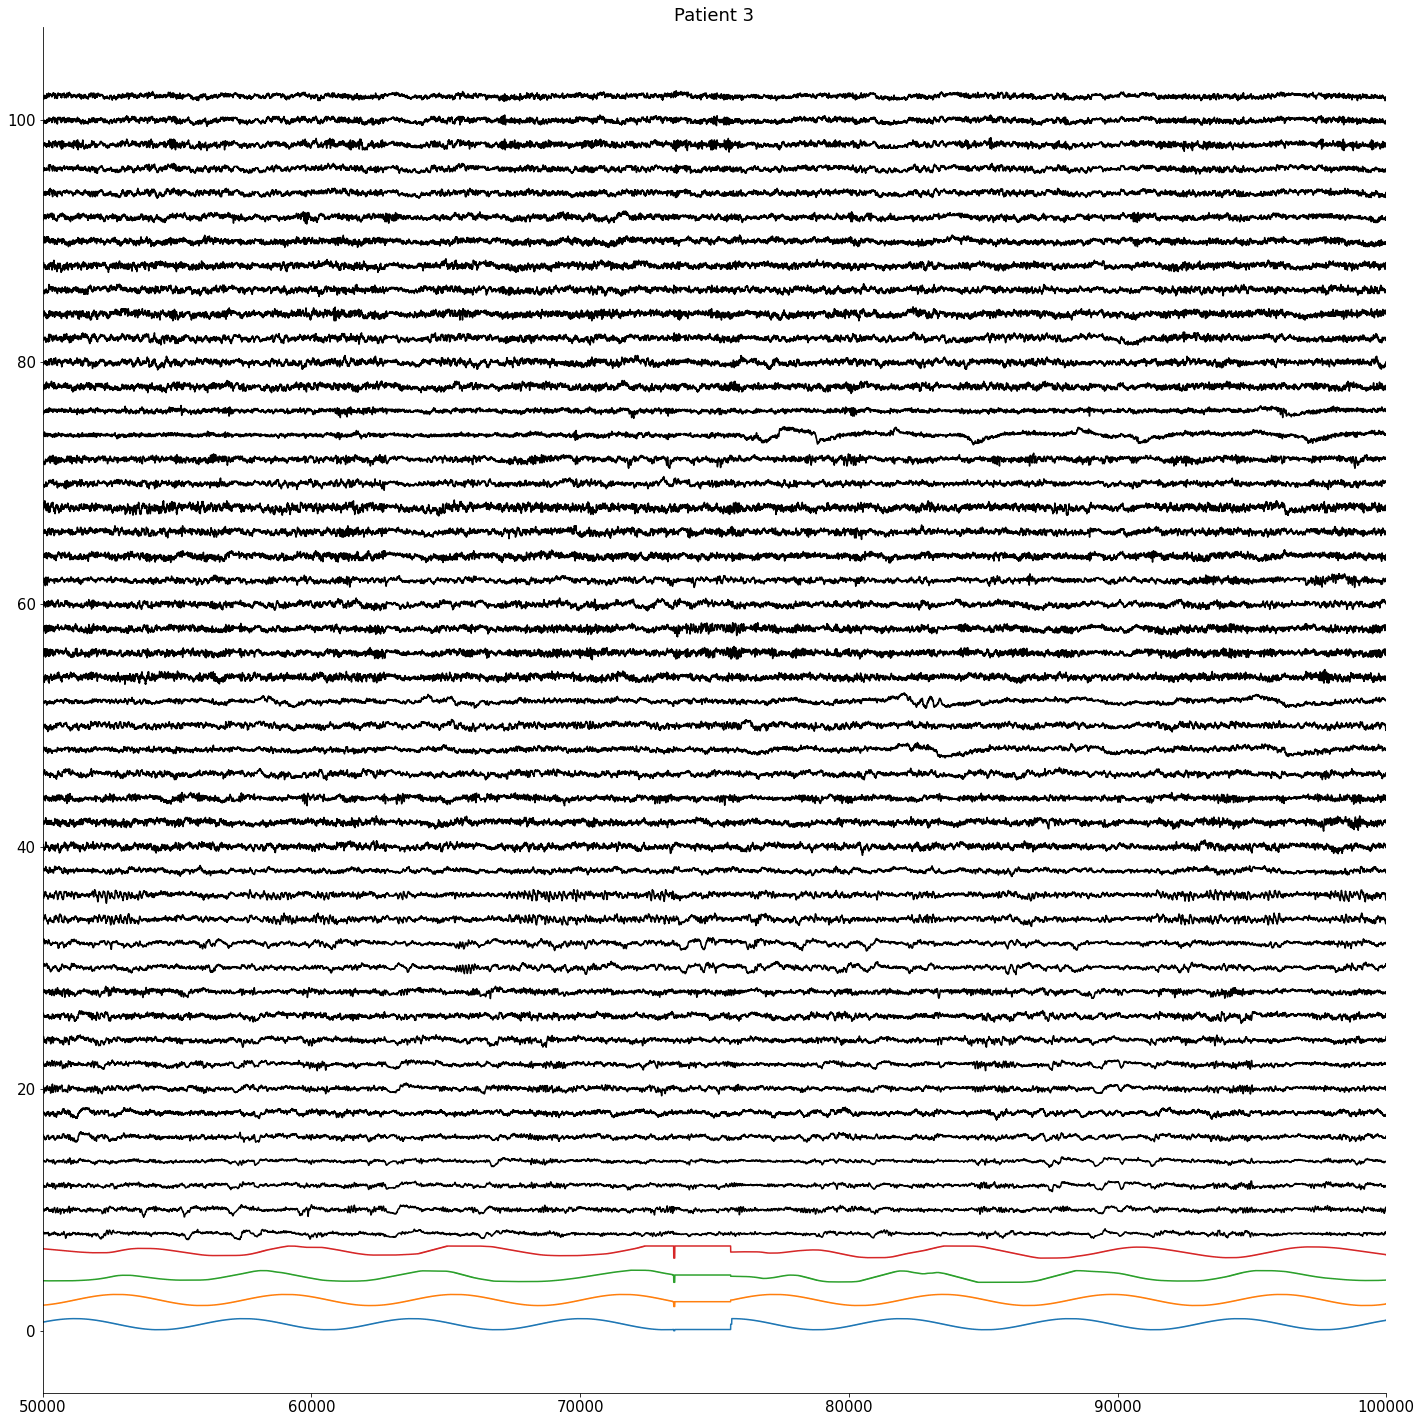

In [41]:
# Normalised Voltage Visualisation for all patients, compared with dependent variable cursor position
for p in range(4):
    dat = alldat[0, p]
    
    V = dat['V']
    V_norm = preprocessing.normalize(V)
    
    targetX = dat['targetX'].flatten()
    targetY = dat['targetY'].flatten()
    targetX_norm = preprocessing.normalize([targetX])[0]
    targetY_norm = preprocessing.normalize([targetY])[0]
    
    cursorX = dat['cursorX'].flatten()
    cursorY = dat['cursorY'].flatten()
    cursorX_norm = preprocessing.normalize([cursorX])[0]
    cursorY_norm = preprocessing.normalize([cursorY])[0]
    
    nchan = V.shape[1] #Number of channels
    nt = V.shape[0]    #Number of data points
    
    #number of signals to plot (nchan + target X,Y + cursor X,Y)
    signals = dict()
    labels = ['targetX', 'targetY', 'cursorX', 'cursorY']
    signals['targetX'] = targetX_norm / max(targetX_norm)
    signals['targetY'] = targetY_norm / max(targetY_norm)
    signals['cursorX'] = cursorX_norm  / max(cursorX_norm)
    signals['cursorY'] = cursorY_norm / max(cursorY_norm)
    for c in range(nchan):
        signals['V' + str(c)] = V_norm[:,c].flatten()
        

    
    plt.figure(figsize=(20, 20))
    for i, (label, signal) in enumerate(signals.items()):
        #print(min(signal), max(signal))
        if label[0] == 'V':
            plt.plot(signal + i*2, color='k')
        else:
            plt.plot(signal + i*2)
            
    plt.xlim(50000, 100000)
    plt.title('Patient ' + str(p))



In [8]:
print(2)

2
